In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('C:\\Users\\hrish\\Desktop\\BE project\\IDS_ai\\New Folder\\Train_data.csv')
df_test = pd.read_csv('C:\\Users\\hrish\\Desktop\\BE project\\IDS_ai\\New Folder\\test_data.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)

In [2]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [6]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

In [7]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


In [9]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [10]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


In [12]:
from sklearn import linear_model

In [13]:
LR = linear_model.LinearRegression()

In [14]:
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [17]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [18]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

In [19]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [20]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.756 %


In [21]:
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.758 %


In [23]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.762 %


In [25]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [26]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.763 %


In [27]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.019578,0.002275,0.003098,0.002898
1,protocol_type,0.087247,0.031881,0.034698,0.010058
2,service,NaN,0.024715,0.013547,0.008050
3,flag,0.008507,0.038453,0.008518,0.001259
4,src_bytes,NaN,0.135292,0.024384,0.337469
5,dst_bytes,NaN,0.093961,0.005874,0.080063
6,land,0.000005,0.000039,0.000088,0.000050
7,wrong_fragment,0.002960,0.008193,0.014851,0.012979


[Text(0, 0, 'duration'),
 Text(0, 0, 'protocol_type'),
 Text(0, 0, 'service'),
 Text(0, 0, 'flag'),
 Text(0, 0, 'src_bytes'),
 Text(0, 0, 'dst_bytes'),
 Text(0, 0, 'land'),
 Text(0, 0, 'wrong_fragment'),
 Text(0, 0, 'urgent'),
 Text(0, 0, 'hot'),
 Text(0, 0, 'num_failed_logins'),
 Text(0, 0, 'logged_in'),
 Text(0, 0, 'num_compromised'),
 Text(0, 0, 'root_shell'),
 Text(0, 0, 'su_attempted'),
 Text(0, 0, 'num_root'),
 Text(0, 0, 'num_file_creations'),
 Text(0, 0, 'num_shells'),
 Text(0, 0, 'num_access_files'),
 Text(0, 0, 'is_host_login'),
 Text(0, 0, 'is_guest_login'),
 Text(0, 0, 'count'),
 Text(0, 0, 'srv_count'),
 Text(0, 0, 'serror_rate'),
 Text(0, 0, 'srv_serror_rate'),
 Text(0, 0, 'rerror_rate'),
 Text(0, 0, 'srv_rerror_rate'),
 Text(0, 0, 'same_srv_rate'),
 Text(0, 0, 'diff_srv_rate'),
 Text(0, 0, 'srv_diff_host_rate'),
 Text(0, 0, 'dst_host_count'),
 Text(0, 0, 'dst_host_srv_count'),
 Text(0, 0, 'dst_host_same_srv_rate'),
 Text(0, 0, 'dst_host_diff_srv_rate'),
 Text(0, 0, 'dst_

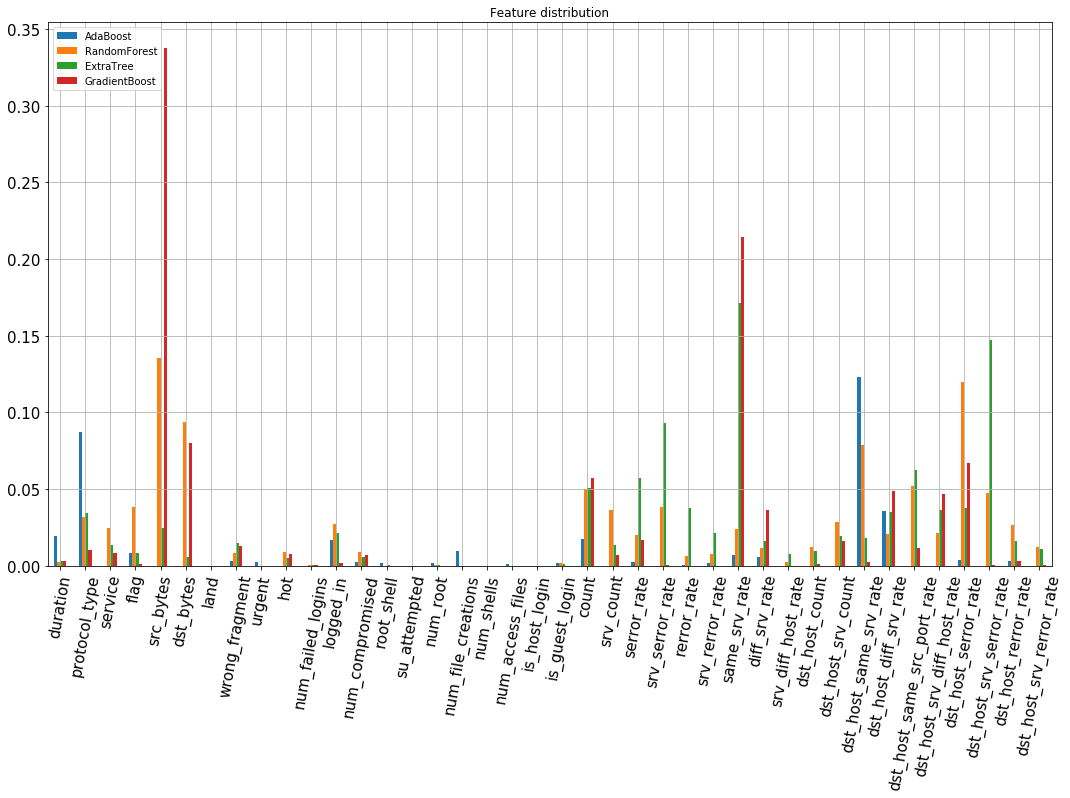

In [28]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15, 
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

In [29]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

In [30]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # duplicate feature삭제
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
9,hot,inf,0.009164,0.005385,0.007642
39,dst_host_srv_rerror_rate,inf,0.012049,0.010657,0.000592
32,dst_host_same_srv_rate,0.123088,0.078816,0.018419,0.002466
1,protocol_type,0.087247,0.031881,0.034698,0.010058
33,dst_host_diff_srv_rate,0.035684,0.020720,0.035202,0.048714
0,duration,0.019578,0.002275,0.003098,0.002898
21,count,0.017493,0.049876,0.050572,0.057240
11,logged_in,0.016643,0.027012,0.021199,0.001942
16,num_file_creations,0.009618,0.000148,0.000167,0.000092
3,flag,0.008507,0.038453,0.008518,0.001259


In [31]:
selected_features = result['features'].values.tolist()
selected_features

['hot',
 'dst_host_srv_rerror_rate',
 'dst_host_same_srv_rate',
 'protocol_type',
 'dst_host_diff_srv_rate',
 'duration',
 'count',
 'logged_in',
 'num_file_creations',
 'flag',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'dst_host_same_src_port_rate',
 'serror_rate',
 'rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_diff_host_rate',
 'src_bytes',
 'dst_bytes',
 'dst_host_srv_count',
 'wrong_fragment',
 'srv_count']

In [32]:
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [33]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.762 %


In [34]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.745 %


In [36]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.755 %


In [38]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [39]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.76 %


In [40]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,hot,dst_host_srv_rerror_rate,dst_host_same_srv_rate,protocol_type,dst_host_diff_srv_rate,duration,count,logged_in,num_file_creations,flag,...,dst_host_same_src_port_rate,serror_rate,rerror_rate,dst_host_serror_rate,dst_host_srv_diff_host_rate,src_bytes,dst_bytes,dst_host_srv_count,wrong_fragment,srv_count
0,0,0.32,1.00,0,0.00,0,110,0,0,4,...,0.00,1.0,0.0,0.65,0.00,0,0,255,0,110
1,0,0.00,1.00,0,0.00,0,1,1,0,2,...,1.00,0.0,0.0,0.00,0.06,312,1856,254,0,9
2,0,0.00,1.00,0,0.00,0,5,1,0,2,...,0.01,0.0,0.0,0.01,0.05,245,2058,255,0,5
3,0,0.00,1.00,0,0.00,0,4,1,0,2,...,0.00,0.0,0.0,0.00,0.00,298,1267,255,0,18
4,0,0.00,0.18,0,0.03,0,1,0,0,2,...,0.18,0.0,0.0,0.00,0.00,740,0,19,0,1


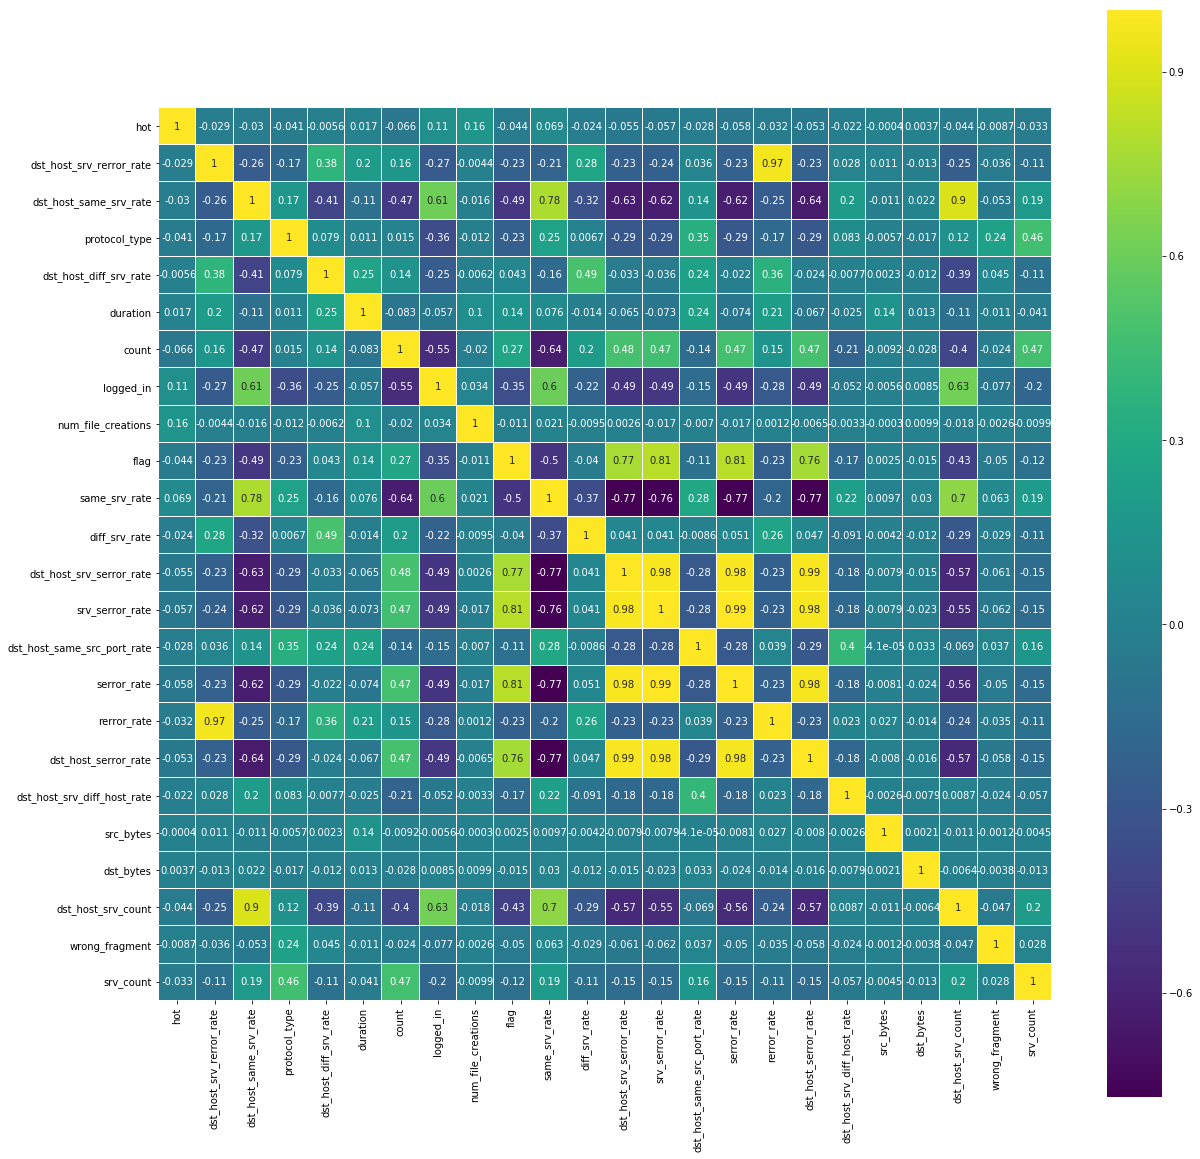

In [41]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [42]:
selected2 = ['dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,hot,dst_host_srv_rerror_rate,dst_host_same_srv_rate,protocol_type,dst_host_diff_srv_rate,duration,count,logged_in,num_file_creations,flag,...,dst_host_srv_serror_rate,srv_serror_rate,dst_host_same_src_port_rate,rerror_rate,dst_host_srv_diff_host_rate,src_bytes,dst_bytes,dst_host_srv_count,wrong_fragment,srv_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,0.093200,0.230181,0.605769,0.278600,0.089412,229.263000,80.152400,0.436600,0.00390,2.20290,...,0.097781,0.101696,0.133167,0.241316,0.020102,6.845032e+03,1.996999e+03,139.645700,0.009000,31.730900
std,0.647731,0.403294,0.436278,0.657134,0.218190,1461.180594,129.028094,0.495989,0.11613,1.07854,...,0.279651,0.295464,0.307154,0.418059,0.089353,8.675409e+04,2.006975e+04,111.548555,0.146701,90.353536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,15.000000,0.000000,1.000000
50%,0.000000,0.000000,0.910000,0.000000,0.020000,0.000000,8.000000,0.000000,0.00000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.400000e+01,4.400000e+01,159.500000,0.000000,6.000000
75%,0.000000,0.220000,1.000000,0.000000,0.060000,0.000000,126.000000,1.000000,0.00000,2.00000,...,0.000000,0.000000,0.030000,0.330000,0.010000,2.850000e+02,5.990000e+02,255.000000,0.000000,16.000000
max,30.000000,1.000000,1.000000,2.000000,1.000000,57715.000000,511.000000,1.000000,5.00000,11.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.291668e+06,1.285078e+06,255.000000,3.000000,511.000000


In [43]:
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [44]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.759 %


In [45]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.759 %


In [47]:
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.744 %


In [49]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [50]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.760 %


In [51]:
LR.fit(X_train_cordrop, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.256 %


In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [55]:
MLP.fit(X_train_cordrop, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [56]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.717 %


In [57]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.756300
2,RandomForest,0.758500
3,ExtraTrees,0.761900
4,GradientBoost,0.763500


[Text(0, 0, 'Linear Regression'),
 Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost')]

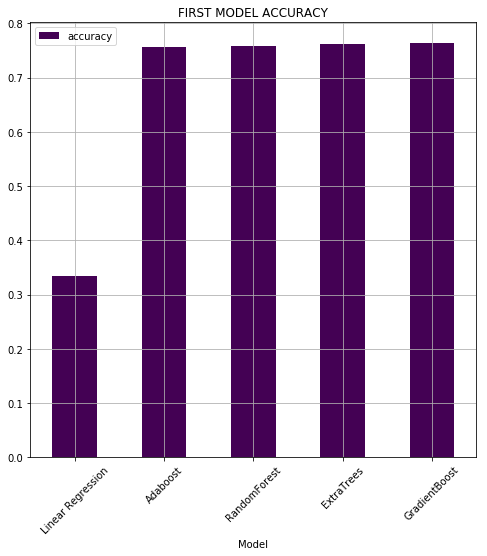

In [58]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

In [59]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7622
1,RandomForest,0.7452
2,ExtraTrees,0.7553
3,GradientBoost,0.7613


[Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost')]

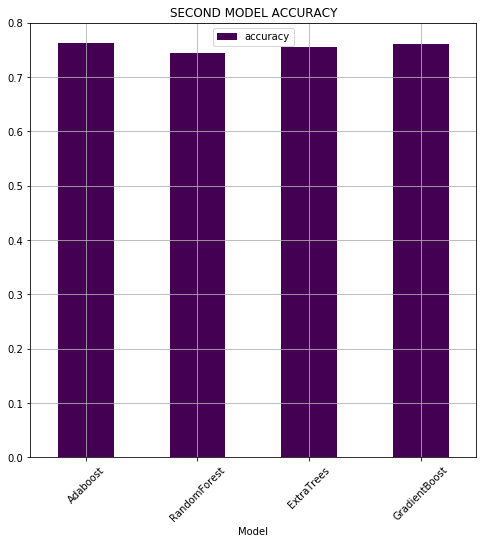

In [60]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

In [61]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.256495
1,Adaboost,0.758900
2,RandomForest,0.759200
3,ExtraTrees,0.743600
4,GradientBoost,0.759800
5,MLP,0.716900


[Text(0, 0, 'Linear Regression'),
 Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost'),
 Text(0, 0, 'MLP')]

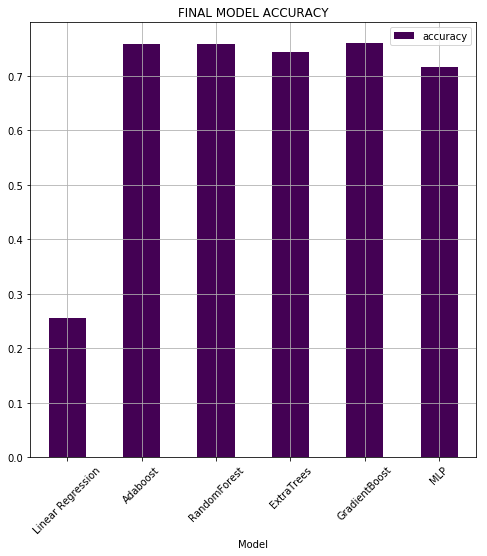

In [62]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)

In [110]:
from tkinter import * 
import tkinter as tk
from tkinter import ttk
from tkinter import Tk
from PIL import Image, ImageTk
from tkdatacanvas import DataCanvas
import io
import csv


window=Tk()
        
window.geometry("1000x1000")
window.title("Welcome to Intrusion Detection System")
scrollbar = Scrollbar(window)
scrollbar.pack(side = RIGHT, fill = BOTH) 

"""def nwindow():
    nwin = Toplevel()
    nwin.title("New Window")
    
    photo2 = PhotoImage(file = 'Graph_1.jpg')
    lbl2 = Label(nwin, image = photo2)
    lbl2.pack()
    nwin.mainloop()
   """ 
def printt():
    label2=Label(window,text="GradientBoostingClassifier processing -",font=('ariel',16,'bold'))
    label2.place(x=550,y=100)
    label3=Label(window,text="GradientBoostingClassifier Score: %2f %%" % gb2_score,font=('ariel',16,'bold'))
    label3.place(x=550,y=150)

"""    def create_window():
    root = tk.Tk()
    window = tk.Toplevel(root)
    button3=Button(window,text="Show Graph",fg='blue',relief='raised',font=('ariel',16,'bold'),command=image)
    button3.place(x=1100,y=250)
""" 
    
def image():
    canvas = Canvas(window, width = 1200, height = 1000)      
    canvas.place(x=10,y=350)
    img = ImageTk.PhotoImage(file="C:\\Users\\hrish\\Desktop\\BE project\\Graph_1.jpg")
    canvas.create_image(20,20, anchor=NW, image=img)
    mainloop()

def image1():
    canvas = Canvas(window, width = 600, height = 1000)      
    canvas.place(x=1250,y=350)
    img = ImageTk.PhotoImage(file="C:\\Users\\hrish\\Desktop\\BE project\\Graph_2.jpg")
    canvas.create_image(20,20, anchor=NW, image=img)
    mainloop()

def next_page():      
    def test():
        # Create a root window
        root = Tk()
        obj = Scrollbar(root)
        obj.pack(side=BOTTOM,fill=X)
        # Create a DataCanvas widget
        dc = DataCanvas(root)
        dc.pack(side="top", expand=1, fill="both")

        # Display the contents of some CSV file
        with io.open("test_data1.csv", "r", newline="") as csv_file:
            reader = csv.reader(csv_file)
            parsed_rows = 0
            for row in reader:
                if parsed_rows == 0:
                    # Display the first row as a header
                    dc.add_header(*row)
                else:
                    dc.add_row(*row)
                parsed_rows += 1
        dc.display()

        # Start Tk's event loop
        root.mainloop()

    def train_edit():
        # Create a root window
        root1 = Tk()
        obj = Scrollbar(root1)
        obj.pack(side=BOTTOM,fill=X)
        # Create a DataCanvas widget
        dc = DataCanvas(root1)
        dc.pack(side="top", expand=1, fill="both")

        # Display the contents of some CSV file
        with io.open("train_data2.csv", "r", newline="") as csv_file:
            reader = csv.reader(csv_file)
            parsed_rows = 0
            for row in reader:
                if parsed_rows == 0:
                    # Display the first row as a header
                    dc.add_header(*row)
                else:
                    dc.add_row(*row)
                parsed_rows += 1
        dc.display()

        # Start Tk's event loop
        root1.mainloop()

    def train():
        # Create a root window
        root2 = Tk()
        obj = Scrollbar(root2)
        obj.pack(side=BOTTOM,fill=X)
        # Create a DataCanvas widget
        dc = DataCanvas(root2)
        dc.pack(side="top", expand=1, fill="both")

        # Display the contents of some CSV file
        with io.open("train_data1.csv", "r", newline="") as csv_file:
            reader = csv.reader(csv_file)
            parsed_rows = 0
            for row in reader:
                if parsed_rows == 0:
                    # Display the first row as a header
                    dc.add_header(*row)
                else:
                    dc.add_row(*row)
                parsed_rows += 1
        dc.display()

        # Start Tk's event loop
        root2.mainloop()
    
    def next_page1():
        root3 = Tk()
        def printt1():
            label9=Label(root3,text='LinearRegression_final Score: %.3f %%' % lr_finalscore,font=('ariel',16,'bold'))
            label9.place(x=550,y=350)
        
        def printt2():
            label10=Label(root3,text='AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore,font=('ariel',16,'bold'))
            label10.place(x=550,y=450)
        
        def printt3():
            label11=Label(root3,text='RandomForestClassifier_final Score: %.3f %%' % rf_finalscore,font=('ariel',16,'bold'))
            label11.place(x=550,y=550)
        
        def printt4():
            label12=Label(root3,text='ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore,font=('ariel',16,'bold'))
            label12.place(x=550,y=650)
        
        def printt():
            label13=Label(root3,text="GradientBoostingClassifier Score: %2f %%" % gb_finalscore,font=('ariel',16,'bold'))
            label13.place(x=550,y=750)
        
        def printt5():
            label14=Label(root3,text='MLP_final Score: %.3f %%' % mlp_finalscore,font=('ariel',16,'bold'))
            label14.place(x=550,y=850)
        
        def predict():
            root4 = Tk()
            root4.geometry("1000x1000")
            root4.title("Welcome to Intrusion Detection System")
            scrollbar = Scrollbar(root4)
            scrollbar.pack(side = RIGHT, fill = BOTH) 

            def prediction():
                Xnew = X_test_cordrop.sample(n = 1)
                # make a prediction
                ynew = GB.predict(Xnew)
                # show the inputs and predicted outputs
                #print("X=%s, Predicted=%s" % (Xnew, ynew))
                label19=Label(root4,text="X=%s, Predicted=%s" % (Xnew, ynew),font=('ariel',16))
                label19.place(x=550,y=350)    
                if ynew == 0:
                    label16=Label(root4,text='Denial of Service Attack',font=('ariel',16,'bold'))
                    label16.place(x=350,y=700)
        
                elif ynew == 1:
                    label16=Label(root4,text='Normal',font=('ariel',16,'bold'))
                    label16.place(x=350,y=700)
        
                elif ynew == 2:
                    label16=Label(root4,text='Probe',font=('ariel',16,'bold'))
                    label16.place(x=350,y=700)
                else:
                    label16=Label(root4,text='R2L',font=('ariel',16,'bold'))
                    label16.place(x=350,y=700)
                    
            
            label1=Label(root4,text="Project- Artificial Intelligence in Network Security",fg='blue',relief='solid',font=('ariel',20,'bold'))
            label1.pack()
            button1=Button(root4,text="Predict",fg='blue',relief='raised',font=('ariel',16,'bold'),command=prediction)
            button1.place(x=100,y=250)
            
            
            root4.mainloop()
        
        root3.geometry("1000x1000")
        root3.title("Welcome to Intrusion Detection System")
        scrollbar = Scrollbar(root3)
        scrollbar.pack(side = RIGHT, fill = BOTH) 


        label1=Label(root3,text="Project- Artificial Intelligence in Network Security",fg='blue',relief='solid',font=('ariel',20,'bold'))
        label1.pack()
        button1=Button(root3,text="Linear Regression",fg='blue',relief='raised',font=('ariel',16,'bold'),command=printt1)
        button1.place(x=100,y=250)
        button2=Button(root3,text="Adaboost",fg='blue',relief='raised',font=('ariel',16,'bold'),command=printt2)
        button2.place(x=400,y=250)
        button3=Button(root3,text="Random Forest",fg='blue',relief='raised',font=('ariel',16,'bold'),command=printt3)
        button3.place(x=600,y=250)
        button4=Button(root3,text="Extra Trees",fg='blue',relief='raised',font=('ariel',16,'bold'),command=printt4)
        button4.place(x=900,y=250)
        button5=Button(root3,text="Gradient Boosting",fg='blue',relief='raised',font=('ariel',16,'bold'),command=printt)
        button5.place(x=1100,y=250)
        button6=Button(root3,text="MLP",fg='blue',relief='raised',font=('ariel',16,'bold'),command=printt5)
        button6.place(x=1450,y=250)
        button7=Button(root3,text="Prediction",fg='blue',relief='raised',font=('ariel',16,'bold'),command=predict)
        button7.place(x=1550,y=250)
    
        root3.mainloop()
    
    window1=Tk()
        
    window1.geometry("1000x1000")
    window1.title("Welcome to Intrusion Detection System")
    scrollbar = Scrollbar(window1)
    scrollbar.pack(side = RIGHT, fill = BOTH) 


    label1=Label(window1,text="Project- Artificial Intelligence in Network Security",fg='blue',relief='solid',font=('ariel',20,'bold'))
    label1.pack()
    button1=Button(window1,text="Testing Data",fg='blue',relief='raised',font=('ariel',16,'bold'),command=test)
    button1.place(x=300,y=250)
    button2=Button(window1,text="Training Data",fg='blue',relief='raised',font=('ariel',16,'bold'),command=train)
    button2.place(x=600,y=250)
    button3=Button(window1,text="Train_Edit",fg='blue',relief='raised',font=('ariel',16,'bold'),command=train_edit)
    button3.place(x=900,y=250)
    button4=Button(window1,text="Classifiers",fg='blue',relief='raised',font=('ariel',16,'bold'),command=next_page1)
    button4.place(x=1200,y=250)
    
    window1.mainloop()
    
    
    #b = tk.Button(root, text="Create new window", command=ImageShow)
#b.pack()    
    
label1=Label(window,text="Project- Artificial Intelligence in Network Security",fg='blue',relief='solid',font=('ariel',20,'bold'))
label1.pack()
#button1=Button(window,text="Accuracy of the System",fg='blue',relief='raised',font=('ariel',16,'bold'),command=printt)
#button1.place(x=200,y=250)
button2=Button(window,text="Feature Distribution",fg='blue',relief='raised',font=('ariel',16,'bold'),command=image)
button2.place(x=150,y=250)
button3=Button(window,text="Final Model Accuracy",fg='blue',relief='raised',font=('ariel',16,'bold'),command=image1)
button3.place(x=550,y=250)
button4=Button(window,text="Dataset",fg='blue',relief='raised',font=('ariel',16,'bold'),command=next_page)
button4.place(x=950,y=250)
   

    


        


  
window.mainloop()   
            
        
    



In [ ]:
"""from tkinter import *
window1=Tk()

l1=Label(window1, text="duration")
l1.grid(row=0, column=0)


l2=Label(window1, text="protocol_type")
l2.grid(row=0, column=1)


l3=Label(window1, text="service")
l3.grid(row=0, column=2)
l4=Label(window1, text="flag")
l4.grid(row=0, column=3)
l5=Label(window1, text="src_bytes")
l5.grid(row=0, column=4)
l6=Label(window1, text="dst_bytes")
l6.grid(row=0, column=5)
l7=Label(window1, text="land")
l7.grid(row=0, column=6)
l8=Label(window1, text="wrong_fragment")
l8.grid(row=0, column=7)
l9=Label(window1, text="urgent")
l9.grid(row=0, column=8)
l10=Label(window1, text="hot")
l10.grid(row=0, column=9)
l11=Label(window1, text="num_failed-logins")
l11.grid(row=0, column=10)
l12=Label(window1, text="logged_in")
l12.grid(row=0, column=11)
l13=Label(window1, text="num_compromised")
l13.grid(row=0, column=12)
l14=Label(window1, text="root_shell")
l14.grid(row=0, column=13)
l15=Label(window1, text="su_attempted")
l15.grid(row=0, column=14)
l16=Label(window1, text="num_root")
l16.grid(row=0, column=15)
l17=Label(window1, text="num_file_creations")
l17.grid(row=0, column=16)
l18=Label(window1, text="num_shells")
l18.grid(row=0, column=17)
l19=Label(window1, text="num_access_files")
l19.grid(row=0, column=18)
l20=Label(window1, text="num_outbound_cmds")
l20.grid(row=0, column=19)
l21=Label(window1, text="is_host_login")
l21.grid(row=0, column=20)
l22=Label(window1, text="count")
l22.grid(row=0, column=21)
l23=Label(window1, text="srv_count")
l23.grid(row=0, column=22)
l24=Label(window1, text="serror_rate")
l24.grid(row=0, column=23)
l25=Label(window1, text="srv_serror_rate")
l25.grid(row=0, column=24)
l26=Label(window1, text="rerror_rate")
l26.grid(row=0, column=25)
l27=Label(window1, text="srv_rerror_rate")
l27.grid(row=0, column=26)
l28=Label(window1, text="same_srv_rate")
l28.grid(row=0, column=27)
l29=Label(window1, text="diff_srv_rate")
l29.grid(row=0, column=28)
l30=Label(window1, text="srv_diff_host_rate")
l30.grid(row=0, column=29)
l31=Label(window1, text="dst_host_count")
l31.grid(row=0, column=30)
l32=Label(window1, text="dst_host_srv_count")
l32.grid(row=0, column=31)
l33=Label(window1, text="dst_host_same_srv_rate")
l33.grid(row=0, column=32)
l34=Label(window1, text="dst_host_diff_srv_rate")
l34.grid(row=0, column=33)
l35=Label(window1, text="dst_host_same_src_port_rate")
l35.grid(row=0, column=34)
l36=Label(window1, text="dst_host_srv_diff_host_rate")
l36.grid(row=0, column=35)
l37=Label(window1, text="dst_host_serror_rate")
l37.grid(row=0, column=36)
l38=Label(window1, text="dst_host_srv_serror_rate")
l38.grid(row=0, column=37)
l39=Label(window1, text="dst_host_rerror_rate")
l39.grid(row=0, column=38)
l40=Label(window1, text="dst_host_rerror_rate")
l40.grid(row=0, column=39)
l41=Label(window1, text="dst_host_srv_rerror_rate")
l41.grid(row=0, column=40)
l42=Label(window1, text="xAttack")
l42.grid(row=0, column=41)

window1.mainloop()   
"""

In [67]:
"""import tkinter
import csv

root = tkinter.Tk()

# open file
with open("test_data1.csv", newline = "") as file:
   reader = csv.reader(file)

   # r and c tell us where to grid the labels
   r = 0
   for col in reader:
      c = 0
      for row in col:
         # i've added some styling
         label = tkinter.Label(root, width = 10, height = 2, \
                               text = row, relief = tkinter.RIDGE)
         label.grid(row = r, column = c)
         c += 1
      r += 1

root.mainloop()"""

In [65]:
"""from tkinter import *
from tkmagicgrid import *
import io
import csv

# Create a root window
root = Tk()

# Create a MagicGrid widget
grid = MagicGrid(root)
grid.pack(side="top", expand=1, fill="both")

# Display the contents of some CSV file
# (note this is not a particularly efficient viewer)
with io.open("test_data1.csv", "r", newline="") as csv_file:
    reader = csv.reader(csv_file)
    parsed_rows = 0
    for row in reader:
        if parsed_rows == 0:
    	    # Display the first row as a header
    	    grid.add_header(*row)
        else:
    	    grid.add_row(*row)
        parsed_rows += 1

# Start Tk's event loop
root.mainloop()"""

In [78]:

from tkinter import *
from tkdatacanvas import DataCanvas
import io
import csv

def test():
    # Create a root window
    root = Tk()
    obj = Scrollbar(root)
    obj.pack(side=BOTTOM,fill=X)
    # Create a DataCanvas widget
    dc = DataCanvas(root)
    dc.pack(side="top", expand=1, fill="both")

    # Display the contents of some CSV file
    with io.open("test_data1.csv", "r", newline="") as csv_file:
        reader = csv.reader(csv_file)
        parsed_rows = 0
        for row in reader:
            if parsed_rows == 0:
                # Display the first row as a header
                dc.add_header(*row)
            else:
                dc.add_row(*row)
            parsed_rows += 1
    dc.display()

    # Start Tk's event loop
    root.mainloop()

def train_edit():
    # Create a root window
    root1 = Tk()
    obj = Scrollbar(root1)
    obj.pack(side=BOTTOM,fill=X)
    # Create a DataCanvas widget
    dc = DataCanvas(root1)
    dc.pack(side="top", expand=1, fill="both")

    # Display the contents of some CSV file
    with io.open("train_data2.csv", "r", newline="") as csv_file:
        reader = csv.reader(csv_file)
        parsed_rows = 0
        for row in reader:
            if parsed_rows == 0:
                # Display the first row as a header
                dc.add_header(*row)
            else:
                dc.add_row(*row)
            parsed_rows += 1
    dc.display()

    # Start Tk's event loop
    root1.mainloop()

def train():
    # Create a root window
    root2 = Tk()
    obj = Scrollbar(root2)
    obj.pack(side=BOTTOM,fill=X)
    # Create a DataCanvas widget
    dc = DataCanvas(root2)
    dc.pack(side="top", expand=1, fill="both")

    # Display the contents of some CSV file
    with io.open("train_data1.csv", "r", newline="") as csv_file:
        reader = csv.reader(csv_file)
        parsed_rows = 0
        for row in reader:
            if parsed_rows == 0:
                # Display the first row as a header
                dc.add_header(*row)
            else:
                dc.add_row(*row)
            parsed_rows += 1
    dc.display()

    # Start Tk's event loop
    root2.mainloop()
    
window=Tk()
        
window.geometry("1000x1000")
window.title("Welcome to Intrusion Detection System")
scrollbar = Scrollbar(window)
scrollbar.pack(side = RIGHT, fill = BOTH) 


label1=Label(window,text="Project- Artificial Intelligence in Network Security",fg='blue',relief='solid',font=('ariel',20,'bold'))
label1.pack()
button1=Button(window,text="Testing Data",fg='blue',relief='raised',font=('ariel',16,'bold'),command=test)
button1.place(x=200,y=250)
button2=Button(window,text="Training Data",fg='blue',relief='raised',font=('ariel',16,'bold'),command=train)
button2.place(x=550,y=250)
button3=Button(window,text="Train_Edit",fg='blue',relief='raised',font=('ariel',16,'bold'),command=train_edit)
button3.place(x=750,y=250)

window.mainloop()

In [71]:

from tkinter import *
from tkdatacanvas import DataCanvas
import io
import csv

# Create a root window
root = Tk()
obj = Scrollbar(root)
obj.pack(side=BOTTOM,fill=X)
# Create a DataCanvas widget
dc = DataCanvas(root)
dc.pack(side="top", expand=1, fill="both")

# Display the contents of some CSV file
with io.open("train_data1.csv", "r", newline="") as csv_file:
    reader = csv.reader(csv_file)
    parsed_rows = 0
    for row in reader:
        if parsed_rows == 0:
    	    # Display the first row as a header
    	    dc.add_header(*row)
        else:
    	    dc.add_row(*row)
        parsed_rows += 1
dc.display()

# Start Tk's event loop
root.mainloop()

In [72]:
from tkinter import *
from tkdatacanvas import DataCanvas
import io
import csv

# Create a root window
root1 = Tk()
obj = Scrollbar(root1)
obj.pack(side=BOTTOM,fill=X)
# Create a DataCanvas widget
dc = DataCanvas(root1)
dc.pack(side="top", expand=1, fill="both")

# Display the contents of some CSV file
with io.open("train_data2.csv", "r", newline="") as csv_file:
    reader = csv.reader(csv_file)
    parsed_rows = 0
    for row in reader:
        if parsed_rows == 0:
    	    # Display the first row as a header
    	    dc.add_header(*row)
        else:
    	    dc.add_row(*row)
        parsed_rows += 1
dc.display()

# Start Tk's event loop
root1.mainloop()

In [75]:
data = pd.read_csv("test_data1.csv")
test_sample, _ = data[n_estimators=2, random_state=1]
# make a prediction
ynew = GB.predict(test_sample)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew, ynew))

SyntaxError: invalid syntax (<ipython-input-75-6ca7b8302ebf>, line 2)